# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2025
## Lab 4: Gordus 
## February 20, 2025

# II.1 Dipoles

II.1 Calculation of the dipole moment of adenine. Calculate the dipole moment of adenine (the x and y components, µx and µy, as well as the magnitude |µ|) and visualize it as a vector plotted on top of the adenine structure.

The tab-separated values file Adenine_qxy.txt contains the partial charges (in elementary charges, qe) and positions (in Å) for all atoms in the adenine structure.

The contributions of the individual atoms are additive, so as discussed in class, we calculate the x and y components of the dipole moment according to

<img src="http://www.gordus.org/public_images/dipoles3.png" style="width: 300px;"/>


where qi is the partial charge of atom i and xi and yi are the coordinates of the atom. Adenine is planar, so we do not need the third (z) dimension here. 

<img src="http://www.gordus.org/public_images/adenine.png" style="width: 200px;"/>


The position of each atom is designated in a coordinate system with its origin at the H atom at position 9 and with the H-N9 bond parallel to the y-axis.

The charge values in the text file are net charge densities that already include the contributions of both the positive and negative charges at each atom position.

**The magnitude of the dipole moment has dimensions of charge*distance. In SI units, the charge is expressed in coulombs (C) and the length in meters (m). A special unit, the debye (D), has been defined for dipole moments.**

**To convert the units used in the table (elementary charge, qe, and Å) to debye (D), multiply with 4.803:
4.803 D =  qe Å**

Import Adenine_qxy.txt as a pandas dataframe to calculate the dipole moment. The headers are: Atom, Element, qi, xi, yi


In [1]:
# These are the libraries you will need for this lab

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re # This is very useful for matching strings using re.search(string,var)



# <font color='red'>Student Input Cell: 2 points</font>   

In [7]:
# Import Data, as a pandas dataframe
file_path = '/Users/cmdb/Documents/GitHub/qblab2/week4/'
filename  = 'Adenine_qxy.txt'
filename = file_path + filename

# The headers are: Atom, Element, qi, xi, yi
df = pd.read_csv(filename, sep="\t", header = 0)


##  II.1a Calculate the dipole moment & magnitude

This will require accesssing data from the DataFrame `df`.

If you want to access a column of data from the DataFrame table, you can use its header name. For example, if you want to access the column of Atoms, you would use:

`df.Atom`


# <font color='red'>Student Input Cell: 4 points</font> 

In [54]:
# Calculate the dipole moment & magnitude
dipole_moment_x = np.sum(df.qi*df.xi)
dipole_moment_y = np.sum(df.qi*df.yi)
dipole_moment = dipole_moment_x + dipole_moment_y
dipole_magnitude = np.sqrt(dipole_moment_x**2 + dipole_moment_y**2)

# Calculate and print the dipole moment along each axis
print(f"The x dipole moment in qe*Å is {dipole_moment_x}.")
print(f"The y dipole moment in qe*Å is {dipole_moment_y}.")


# convert units of e*A to D
debye_x = 4.803 * dipole_moment_x
debye_y = 4.803 * dipole_moment_y
debye_total = 4.803 * dipole_moment
debye_magnitude = 4.803 * dipole_magnitude


# Create a dipole vector
dipole_vector = [np.sum(debye_x),np.sum(debye_y)]

# Calculate and print the magnitude of the vector
dipole_vector_magnitude = np.sqrt(dipole_vector[0]**2 + dipole_vector[1]**2)
print(f"The dipole vector magnitude in Debye is {dipole_vector_magnitude}.")

# Print dipole magnitude
print(f"The dipole magnitude in qe*Å {dipole_magnitude}.")
print(f"The dipole magnitude in Debye {debye_magnitude}.")


The x dipole moment in qe*Å is 0.53138.
The y dipole moment in qe*Å is -0.4211999999999999.
The dipole vector magnitude in Debye is 3.256753279003802.
The dipole magnitude in qe*Å 0.6780664749123052.
The dipole magnitude in Debye 3.256753279003802.


##  II.1b Plot the atomic coordinates for adenine. Make sure the aspect ratio for both axes are equal.

### Hydrogen: white
### Carbon: black
### Nigrogen: blue

### re.search

This will require you use the `re.match` function to string-match from your table of data in `df`. The output from this function is an object, but all you really care about is if you were successful or not, so if you wrap this in a `bool()` function, you will return a `True` if there is a match, and a `False` if there is no match.

For example, try executing the following:

`name = 'Andrew'`

`match = bool(re.match('A',name))`

`print(match)`

`match = bool(re.match('Z',name))`

`print(match)`


### plt.arrow()

To draw the dipole moment, use the `plt.arrow` function:

`plt.arrow(x,y,dx, dy,head_width = 0.3)`

For `x,y` (the anchor of the arrow), use `0,0`.

### plt.axis('scaled')
To ensure your plot is scaled correctly, please use:

`plt.axis('scaled')`

### plt.plot( ..., 'o',markerfacecolor = color, markeredgecolor = color)

**Marker**
To only plot circle markers, with no lines connecting them, include a marker argument for a circle (`'o'`) to your plot execution:

`plt.plot(x,y,'o')`

There are numerous markers available in matplotlib. You can find a list of them here:

https://matplotlib.org/stable/api/markers_api.html

**Colors**
matplotlib has single-letter codes you can use to define plot element colors:

Representing basic colors:
'b': blue
'g': green
'r': red
'c': cyan
'm': magenta
'y': yellow
'k': black
'w': white

You can color your markers by simply adding this string to your marker option. For example, to plot your data with a red circle:

`plt.plot(x,y,'ro')`

**Marker face and edge colors**

The above code creates a marker with matching edge and face color. If you want to call these separately, you can use the `markerfacecolor` and `markeredgecolor` arguments. For example, if you wanted to make white markers with a black edge:

`plt.plot(x,y,'o',markerfacecolor = 'w',markeredgecolor = 'k')`

`plt.axis('scaled')`

# <font color='red'>Student Input Cell: 4 points</font> 

In [ ]:
# Plot the atomic coordinates for adenine. Make sure the aspect ratio for both axes are equal.
#
# Hydrogen: white
hydrogens = df[df['Element'] == "H"]
plt.plot(hydrogens.xi,hydrogens.yi,'o',markerfacecolor='white',markeredgecolor='black')
# Carbon: black
carbons = df[df['Element'] == "C"]
plt.plot(carbons.xi,carbons.yi,'o',markerfacecolor='black',markeredgecolor='black')
# Nigrogen: blue
nitrogens = df[df['Element'] == "N"]
plt.plot(nitrogens.xi,nitrogens.yi,'o',markerfacecolor='blue',markeredgecolor='black')


# Plot dipole vector
#
# Use the matplotlib "arrow" tool. I recommend making the head_width = 0.1
plt.arrow(0,0,-dipole_vector[0],-dipole_vector[1],head_width=0.1)
#
# NOTE: The dipole vector you calculated points toward the positive dipole, HOWEVER common
# convention is to draw the arrow pointing to the NEGATIVE dipole, so make sure you adjust
# for this.

plt.axis('scaled')
plt.show()



NameError: name 'df' is not defined

# II.3 Dipole-Dipole vs. Ion-Ion interactions

Plot the energies for a dipole-dipole and for an ion-ion interaction as a function of distance from 3 to 10 Å such that their magnitudes are 1 at r = 3 Å. How does the distance dependence compare for the two types of interactions?


# <font color='red'>Student Input Cell: 5 points</font> 

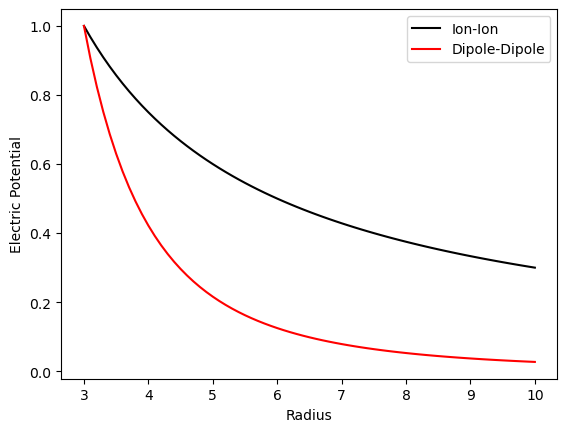

In [53]:
# Plot energies of ion-ion and dipole-dipole interactions vs. distance

# In the equations for charge-charge and dipole-dipole interactions, 
# we can combine all the terms execpt r into one parameter and get
# Ui(r) = A/r for ion-ion interactions and
# Ud (r) = B/r^3 for dipole-dipole interactions
# 
# The energies at r = 3 A are 1 if
# Ui(3) = Ud(3) = 1, 
# so 1 = A/3 = B/27 (we do not worry about units here).
def ui(r):
    return A/r

def ud(r):
    return B/r**3

# set values for A and B
A = 3
B = 27

# create a distance vector from 3 to 10; with step size 0.1
distance_vector = np.arange(3,10.1,0.1)

# plot
plt.plot(distance_vector,ui(distance_vector),'k',label="Ion-Ion")
plt.plot(distance_vector,ud(distance_vector),'r',label="Dipole-Dipole")
plt.legend()

# label axes
plt.xlabel("Radius")
plt.ylabel("Electric Potential")
plt.show()